Hyperparameters definition and loading of CIFAR100 from pytorch torchvision

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

#hyperparameters
batch_size = 100

pad_totensor_transform = transforms.Compose([transforms.Pad(2), transforms.ToTensor()]) # does the padding, images 32x32 become 36x36 (symmetric increase) so that are divisible by three and patches are 12x12

train_dataset = torchvision.datasets.CIFAR100(root='./cifar100_data', train=True, transform=pad_totensor_transform, download=True)

test_dataset = torchvision.datasets.CIFAR100(root='./cifar100_data', train=False, transform=pad_totensor_transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified


In [2]:
#test dataloader

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 3, 36, 36]) torch.Size([100])


torch.Size([3, 36, 36])


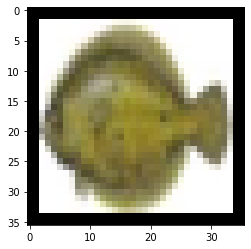

In [3]:
import matplotlib.pyplot as plt

one = samples[0]
print(one.shape)
plt.imshow(one.permute(1, 2, 0))
plt.show()

**Training loop**

In [8]:
from mlp_mixer import *
from tqdm.notebook import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model = MLP_mixer()
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

num_epochs = 10
steps_total = len(train_loader)

# training loop
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(tqdm(train_loader)):
        # [100, 3, 36, 36] is what is returned by iterator
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = loss_func(outputs, labels)

        # backwards pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if False and (i+1) % 100:
            print(f'epoch: {epoch+1} of {num_epochs}, step {i+1} of {steps_total}, loss = {loss.item():.4f}')
    print(f"Loss of epoch {epoch+1}: {loss.item():.4f}")


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 0: 4.0204


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 1: 3.7052


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 2: 3.5026


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 3: 3.2369


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 4: 3.2699


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 5: 3.2484


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 6: 3.2541


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 7: 3.2004


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 8: 3.1626


  0%|          | 0/500 [00:00<?, ?it/s]

Loss of epoch 9: 3.1426
